# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов!

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [ ]:
print('Train data missing values:', df_train.isna().sum())
print('Test data missing values:', df_test.isna().sum())


Train data missing values: name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
Test data missing values: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


In [ ]:
print('Train data duplicates:', df_train.duplicated().sum())
print('Test data duplicates:', df_test.duplicated().sum())

Train data duplicates: 985
Test data duplicates: 62


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Train data")
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'

Из данного дашборда можно сделать много интересных выводов:
1. Признаки km_driven и year имеют высокую корреляцию, и вероятно, один из них стоит убрать
2. transmission и year имеют высокую корреляцию с таргетом, значит, эти признаки могут быть очень важны для правильной оценки цены

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [ ]:
numeric_cols = df_train.select_dtypes(include=np.number).columns
df_train[numeric_cols].describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
df_train[numeric_cols].median()

year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64

In [ ]:
df_test[numeric_cols].describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [ ]:
df_test[numeric_cols].median()

year               2014.0
selling_price    434999.0
km_driven         61500.0
seats                 5.0
dtype: float64

1. Если сравнить среднее и медиану внутри трейна и теста, то видно, что почти все средние близки к медиане, кроме selling_price, где медиана сильно меньше чем среднее, что говорит о том, что присутсвуют очень большие значения таргета.
2. Если сравнивать статистики между трейном и тестом, то значения достаточно близки, что говорит о том, что выборки получены из одинаковых распределений!

In [ ]:
categorical_cols = df_train.select_dtypes(exclude=np.number).columns
df_train[categorical_cols].describe()

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [ ]:
df_test[categorical_cols].describe()

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [ ]:
print("Duplicates in train data:", df_train.drop(['selling_price'], axis=1).duplicated().sum())
print("Duplicates in test data:", df_test.drop(['selling_price'], axis=1).duplicated().sum())

Duplicates in train data: 1159
Duplicates in test data: 69


In [ ]:
df_train.drop(['selling_price'], axis=1).duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [ ]:
df_test.drop(['selling_price'], axis=1).duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
df_train = df_train[~df_train.drop(['selling_price'], axis=1).duplicated()]

In [ ]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [ ]:
def transform_mileage(mileage):
    try:
        if pd.isna(mileage):
            return np.nan
        return float(mileage.split()[0])
    except:
        print(mileage)
        return np.nan

In [ ]:


df_train['mileage'] = df_train['mileage'].apply(transform_mileage)
df_test['mileage'] = df_test['mileage'].apply(transform_mileage)

In [ ]:
df_train['engine'] = df_train['engine'].apply(transform_mileage)
df_test['engine'] = df_test['engine'].apply(transform_mileage)

In [ ]:
df_train['max_power'] = df_train['max_power'].apply(transform_mileage)
df_test['max_power'] = df_test['max_power'].apply(transform_mileage)

 bhp


In [ ]:
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
6992              96.1Nm@ 3000rpm
6993                90Nm@ 3500rpm
6994             113.7Nm@ 4000rpm
6995    24@ 1,900-2,750(kgm@ rpm)
6996               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [ ]:
import re

def transform_torque(row):
    try:
        torque_match = re.search(r"([\d.]+)\s?(Nm|kgm)", row, re.IGNORECASE)
        rpm_match = re.search(r"(\d+)[-–]?(\d+)?\s*rpm", row.replace(",", ""), re.IGNORECASE)

        if torque_match:
            torque_value = float(torque_match.group(1))
            if torque_match.group(2).lower() == "kgm":
                torque_value *= 9.80665
        else:
            torque_value = np.nan

        if rpm_match:
            max_rpm = float(rpm_match.group(2)) if rpm_match.group(2) else float(rpm_match.group(1))
        else:
            max_rpm = np.nan

        return pd.Series([torque_value, max_rpm])
    except:
        return pd.Series([np.nan, np.nan])



df_train[['torque', 'max_torque_rpm']] = df_train["torque"].apply(transform_torque)


In [ ]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

      torque  seats  max_torque_rpm  
0  190.00000    5.0          2000.0  
1  250.00000    5.0          2500.0  
2  219.66896    5.0          2750.0  
3        NaN    5.0             NaN  
4  113.75000    5.0          4000.0

In [ ]:
df_test[['torque', 'max_torque_rpm']] = df_test["torque"].apply(transform_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [ ]:
numeric_cols = df_train.select_dtypes(include=np.number).columns
medians_to_fill = df_train[numeric_cols].median()
df_train.fillna(medians_to_fill, inplace=True)
df_test.fillna(medians_to_fill, inplace=True)

In [ ]:
categorical_cols = df_train.select_dtypes(exclude=np.number).columns
df_train[categorical_cols].isna().sum()

name            0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

1. Использование медианы вместо среднего позволяет избежать сдвига значений из-за выбросов, и сохранить распределение
2. Нужно использовать медиану из трейна чтобы избежать data leak

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [ ]:
cols_to_int = ['engine', 'seats']
df_train[cols_to_int] = df_train[cols_to_int].astype(int)
df_test[cols_to_int] = df_test[cols_to_int].astype(int)

In [ ]:
df_train.seats.value_counts()

seats
5     4618
7      800
8      191
4       94
9       68
6       48
10      18
2        2
14       1
Name: count, dtype: int64

Seats можно рассмотреть как категориальную переменнут, так как таргет не зависит от seats как-то линейно в зависимости от роста или падения количества сидений. Скорее каждое количество сидений говорит о типе машины, и например машина с 2 местами, может быть дороже, чем машина с 6

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [ ]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   171.209333     5.426712     3039.864384  
std      31.640418    82.643972     0.982344      863.769095  
min       0.000000    47.071920     2.000000      500.000000  
25%      68.000000   112.000000     5.000000     2475.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000   789.000000    14.000000     5300.000000


`Заполнение пропусков не сдвинуло наши распределения, так как мы использовали медиану`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

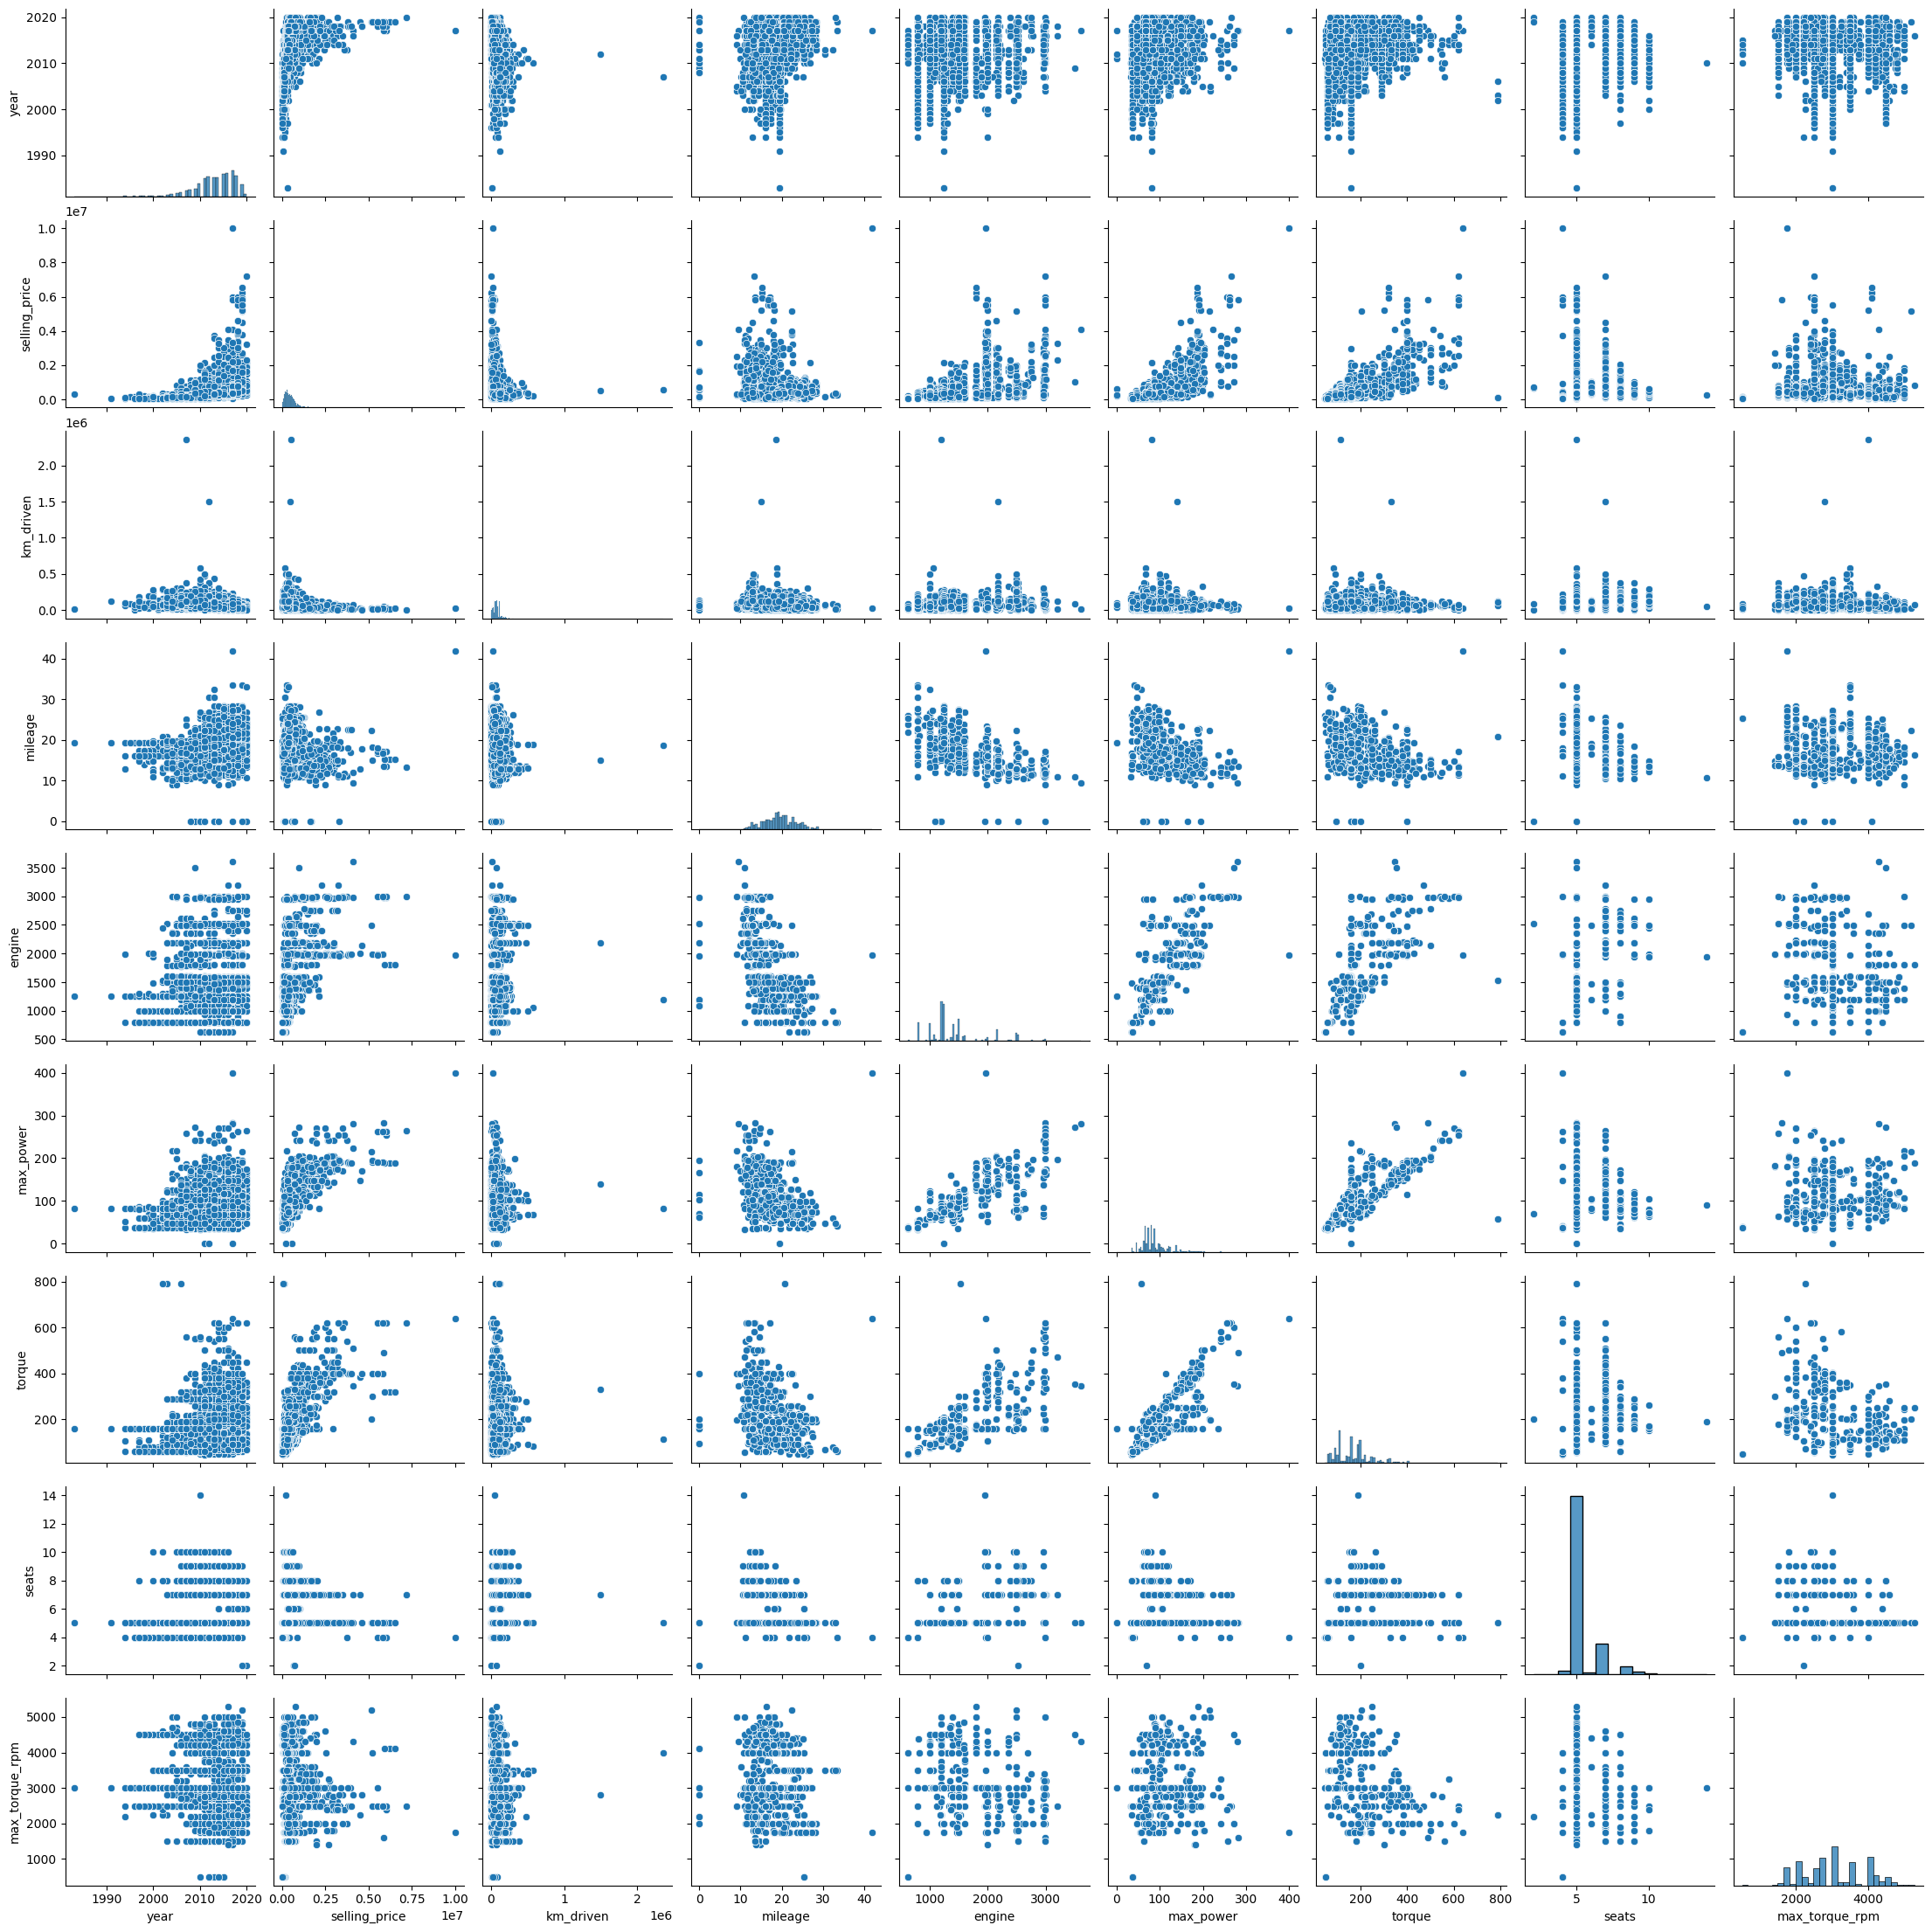

In [ ]:
import seaborn as sns

sns.pairplot(df_train)

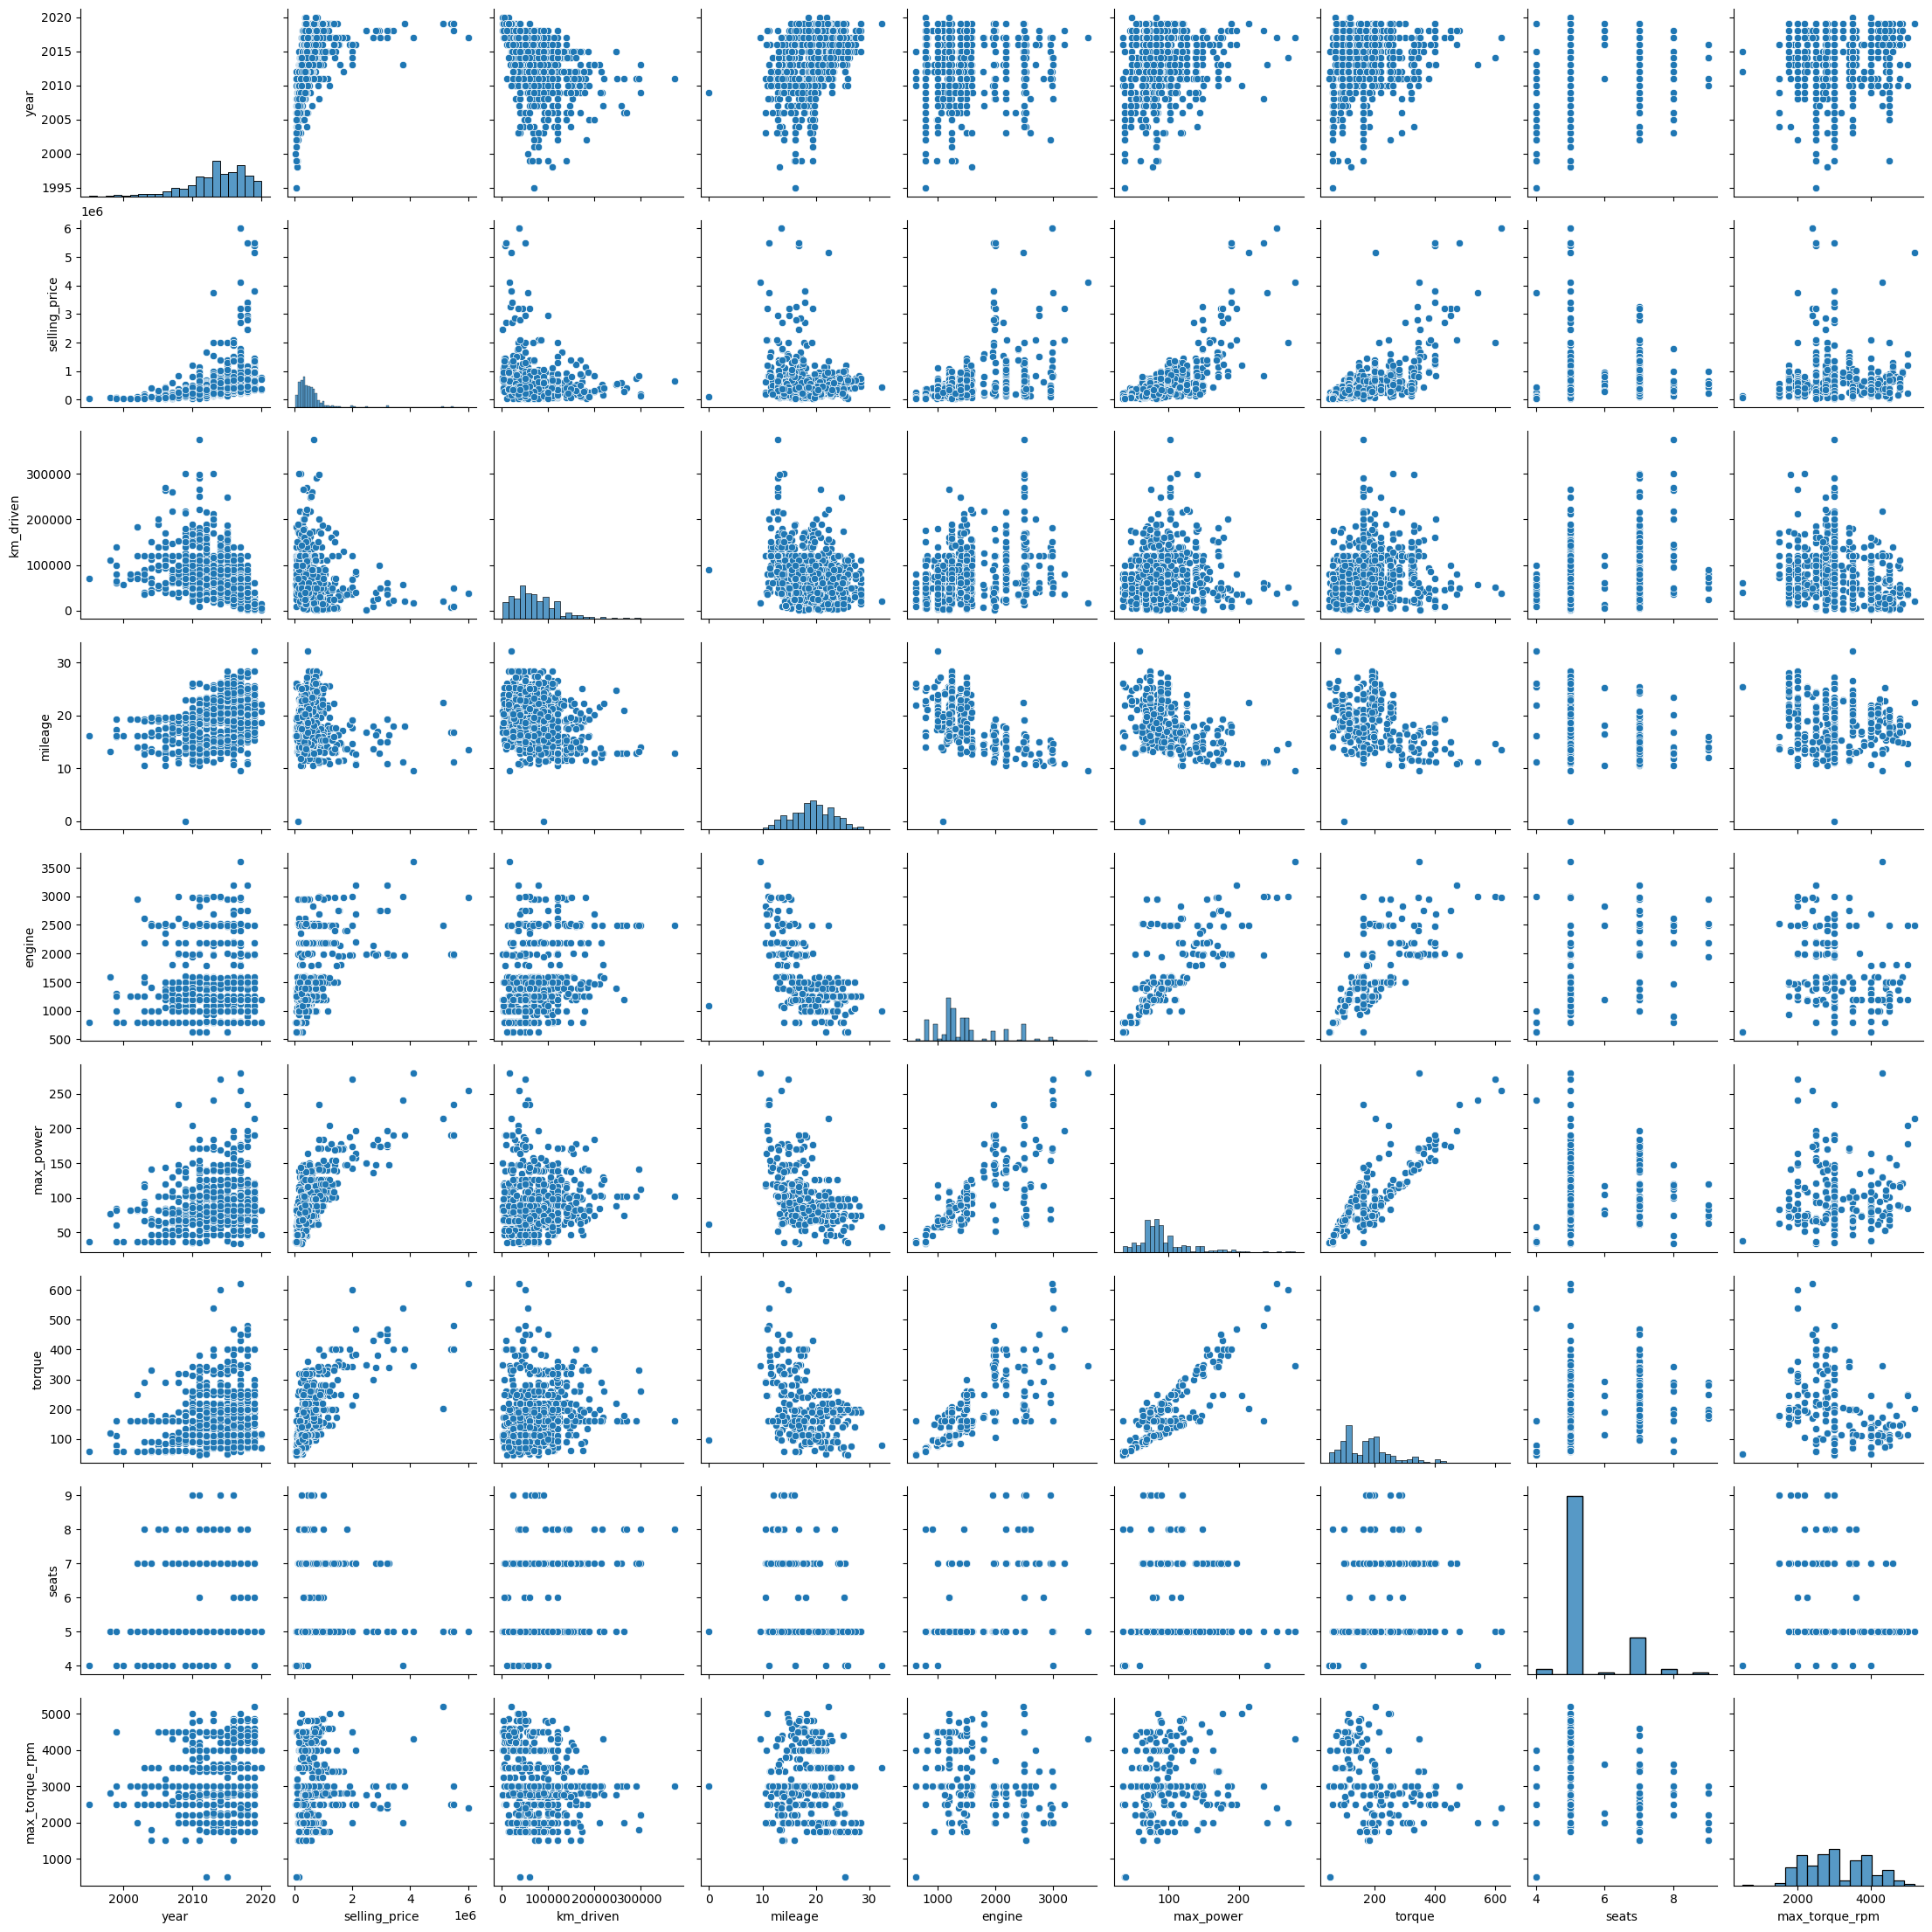

In [ ]:
sns.pairplot(df_test)

1. Да, по данным графикам можно предположить, что признаки engine, max_power, torque, seats, year имеют связь с таргетом, и вероятно будут иметь высокую значимость
2. Да, max_power и torque, engine и max_power, engine и torque
3. Распределения для train и test очень похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

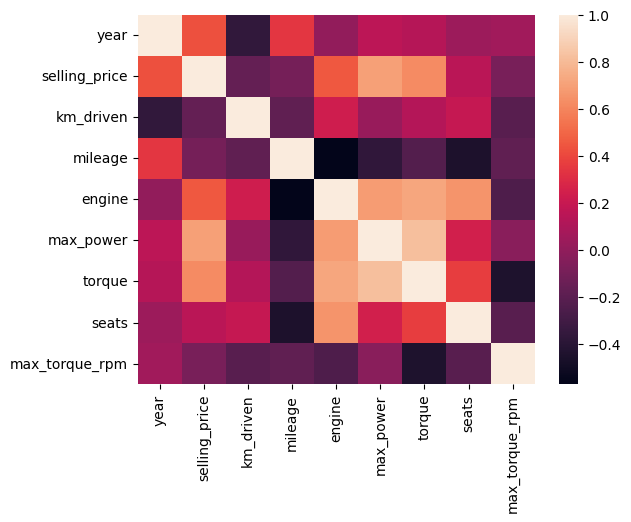

In [ ]:
sns.heatmap(df_train[numeric_cols].corr())

In [ ]:
df_train[numeric_cols].corr()

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.130784       0.619783   0.123436 -0.234310  0.721534   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.058454      -0.089044  -0.213797 -0.185519 -0.253163   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.130784  0.041178        0.058454  
selling_price    0.692814  0.619783  0.149953       -0.089044  
km_driven        0.024588  0.123436  0.192328       -0.213797  
mileage         -0.373390 -0.234310 -0.451059       -0.185519  
engine           0.681117  0.721534  0.652172       -0.253163  
max_power        1.000000  0.820149  0.244112       -0.026347  
torque           0.820149  1.000000  0.361590       -0.446802  
seats            0.244112  0.361590  1.000000       -0.214508  
max_torque_rpm  -0.026347 -0.446802 -0.214508        1.000000

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Признаки year и engine наименее скореллированы между собой
2. Между признаками max_power и torque, torque и engine, max_power и engine, seats и engine
3. Между признаками year и km_driven есть слабая отрицательная корреляция, что может указывать на такую линейную связь

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [ ]:
def spearman_corr(x, y):
    x_ranks = np.argsort(np.argsort(x))
    y_ranks = np.argsort(np.argsort(y))

    n = len(x)

    d = x_ranks - y_ranks

    corr_spearman = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return corr_spearman


df_train[numeric_cols].corr(method=spearman_corr)

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705060  -0.566218  0.342960 -0.034677   
selling_price   0.705060       1.000000  -0.295699  0.026164  0.461866   
km_driven      -0.566218      -0.295699   1.000000 -0.197687  0.303411   
mileage         0.342960       0.026164  -0.197687  1.000000 -0.428987   
engine         -0.034677       0.461866   0.303411 -0.428987  1.000000   
max_power       0.166875       0.612352   0.040464 -0.308684  0.711526   
torque          0.118898       0.576949   0.234232 -0.131165  0.816415   
seats           0.050485       0.220670   0.105454 -0.307221  0.361660   
max_torque_rpm  0.064505      -0.143960  -0.309329 -0.180978 -0.369812   

                max_power    torque     seats  max_torque_rpm  
year             0.166875  0.118898  0.050485        0.064505  
selling_price    0.612352  0.576949  0.220670       -0.143960  
km_driven        0.040464  0.234232  0.105454       -0.309329  
mileage         -0.308684 -0.131165 -0.307221       -0.180978  
engine           0.711526  0.816415  0.361660       -0.369812  
max_power        1.000000  0.744287  0.200687       -0.052753  
torque           0.744287  1.000000  0.275011       -0.570363  
seats            0.200687  0.275011  1.000000       -0.124708  
max_torque_rpm  -0.052753 -0.570363 -0.124708        1.000000

In [ ]:
df_train[numeric_cols].corr(method='spearman')

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
torque          0.116926       0.577452   0.235582 -0.130466  0.819385   
seats           0.048291       0.317605   0.195317 -0.435458  0.527716   
max_torque_rpm  0.066939      -0.143761  -0.311204 -0.182600 -0.373442   

                max_power    torque     seats  max_torque_rpm  
year             0.165798  0.116926  0.048291        0.066939  
selling_price    0.612258  0.577452  0.317605       -0.143761  
km_driven        0.040919  0.235582  0.195317       -0.311204  
mileage         -0.308824 -0.130466 -0.435458       -0.182600  
engine           0.713113  0.819385  0.527716       -0.373442  
max_power        1.000000  0.745736  0.304857       -0.052057  
torque           0.745736  1.000000  0.419555       -0.573783  
seats            0.304857  0.419555  1.000000       -0.204229  
max_torque_rpm  -0.052057 -0.573783 -0.204229        1.000000

`Your answer here`

In [ ]:
import phik
from phik import resources, report

In [ ]:
df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


name      year  selling_price  km_driven      fuel  \
name            1.000000  0.948995       0.994871   0.000000  1.000000   
year            0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
owner           0.830098  0.418636       0.557641   0.087887  0.030943   
mileage         0.999690  0.279253       0.649768   0.081625  0.582304   
engine          1.000000  0.213156       0.503682   0.210747  0.644421   
max_power       0.997906  0.381639       0.872166   0.000000  0.236006   
torque          0.999938  0.341451       0.744951   0.049132  0.642205   
seats           0.999985  0.288178       0.196447   0.096223  0.450714   
max_torque_rpm  0.999820  0.343947       0.226688   0.084913  0.682109   

                seller_type  transmission     owner   mileage    engine  \
name               0.799127      1.000000  0.830098  0.999690  1.000000   
year               0.232412      0.153714  0.418636  0.279253  0.213156   
selling_price      0.334505      0.463058  0.557641  0.649768  0.503682   
km_driven          0.000000      0.012824  0.087887  0.081625  0.210747   
fuel               0.050771      0.053721  0.030943  0.582304  0.644421   
seller_type        1.000000      0.127968  0.176612  0.064736  0.160346   
transmission       0.127968      1.000000  0.096990  0.331889  0.520161   
owner              0.176612      0.096990  1.000000  0.152406  0.186011   
mileage            0.064736      0.331889  0.152406  1.000000  0.588155   
engine             0.160346      0.520161  0.186011  0.588155  1.000000   
max_power          0.331904      0.511877  0.121438  0.687235  0.720780   
torque             0.292064      0.453687  0.141969  0.473426  0.783138   
seats              0.032173      0.045734  0.046741  0.679979  0.603400   
max_torque_rpm     0.121383      0.188056  0.253031  0.392963  0.730446   

                max_power    torque     seats  max_torque_rpm  
name             0.997906  0.999938  0.999985        0.999820  
year             0.381639  0.341451  0.288178        0.343947  
selling_price    0.872166  0.744951  0.196447        0.226688  
km_driven        0.000000  0.049132  0.096223        0.084913  
fuel             0.236006  0.642205  0.450714        0.682109  
seller_type      0.331904  0.292064  0.032173        0.121383  
transmission     0.511877  0.453687  0.045734        0.188056  
owner            0.121438  0.141969  0.046741        0.253031  
mileage          0.687235  0.473426  0.679979        0.392963  
engine           0.720780  0.783138  0.603400        0.730446  
max_power        1.000000  0.908137  0.569587        0.507559  
torque           0.908137  1.000000  0.413817        0.632210  
seats            0.569587  0.413817  1.000000        0.395708  
max_torque_rpm   0.507559  0.632210  0.395708        1.000000

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(
/usr/local/lib/python3.10/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in scalar subtract
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))
/usr/local/lib/python3.10/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in scalar subtract
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))
/usr/local/lib/python3.10/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in scalar subtract
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))
/usr/local/lib/python3.10/dist-packages/phik/ou

(                    name      year  selling_price  km_driven      fuel  \
 name            1.000000  0.948995       0.994871   0.000000  1.000000   
 year            0.948995  1.000000       0.219841   0.081574  0.205834   
 selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
 km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
 fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
 seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
 transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
 owner           0.830098  0.418636       0.557641   0.087887  0.030943   
 mileage         0.999690  0.279253       0.649768   0.081625  0.582304   
 engine          1.000000  0.213156       0.503682   0.210747  0.644421   
 max_power       0.997906  0.381639       0.872166   0.000000  0.236006   
 torque          0.999938  0.341451       0.744951   0.049132  0.642205   
 seats           0.999985

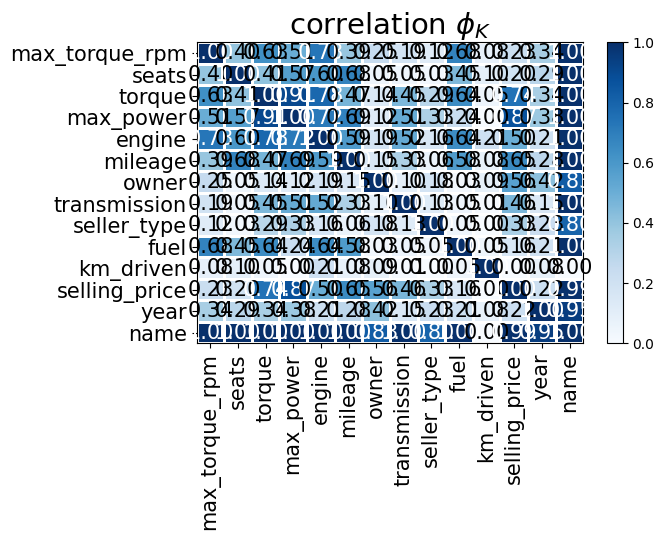

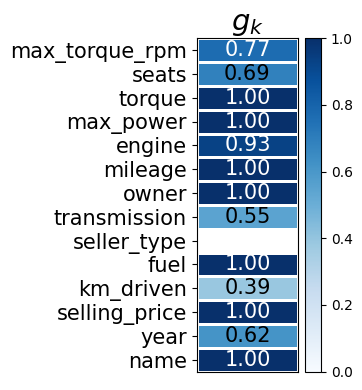

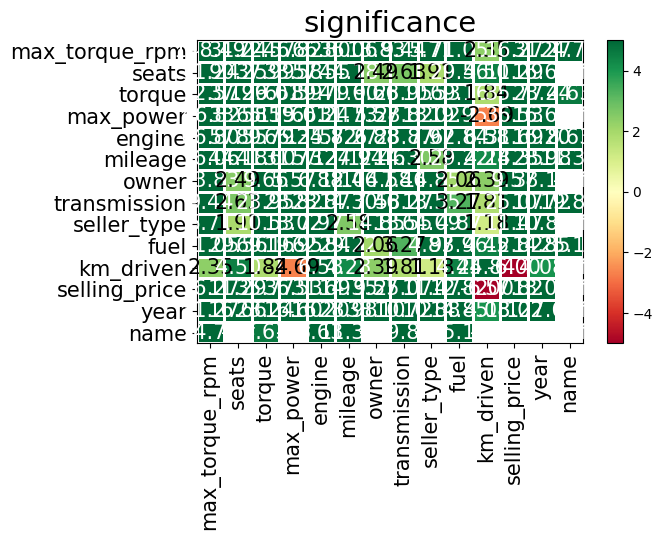

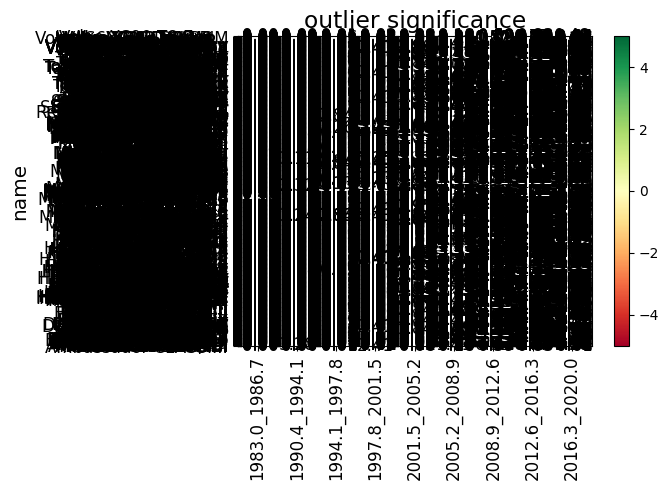

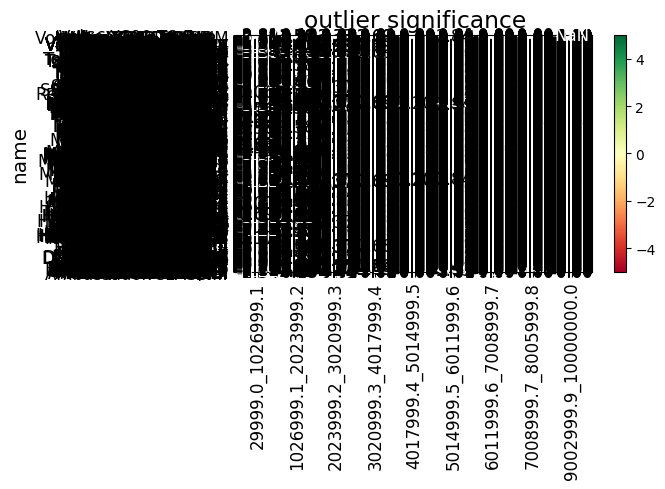

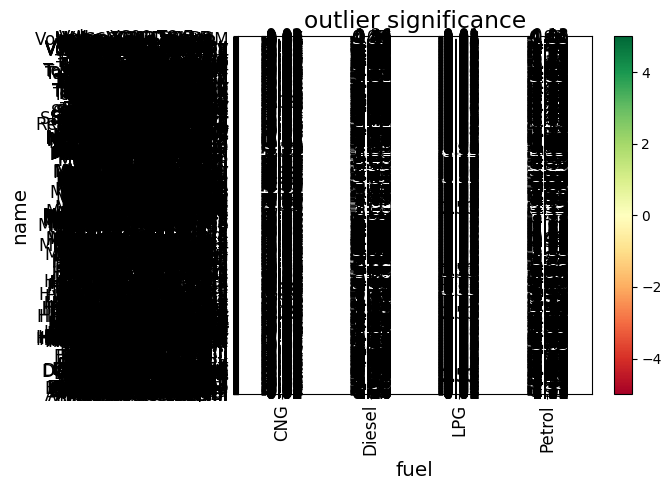

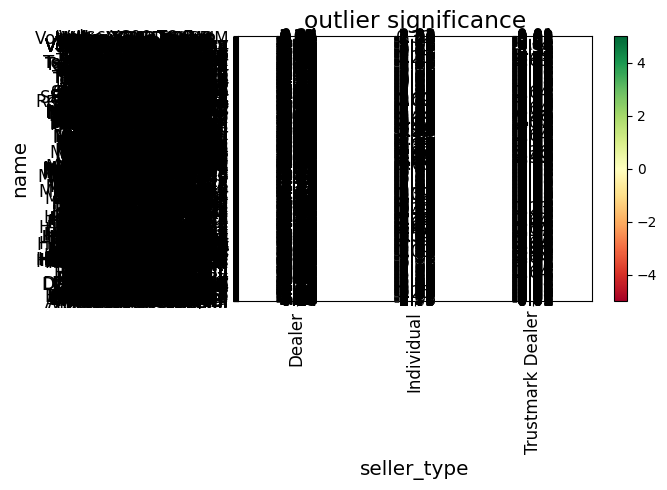

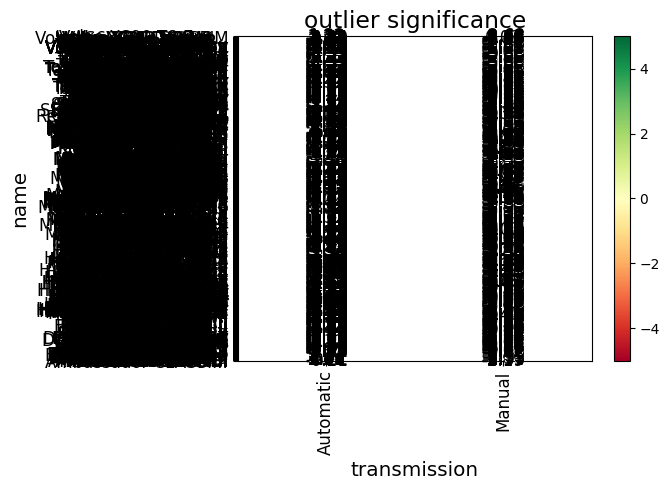

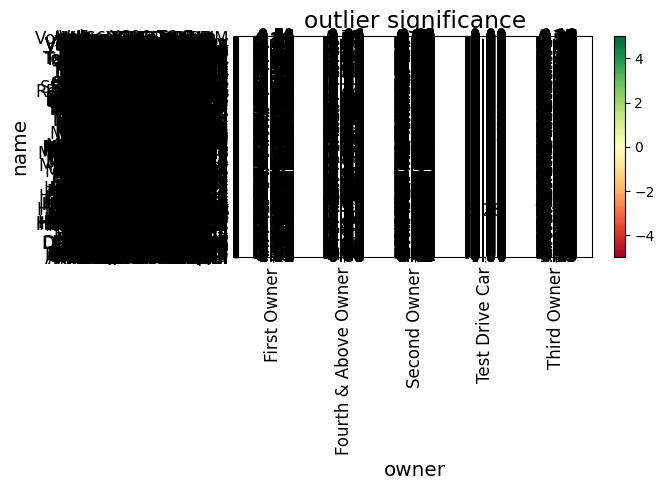

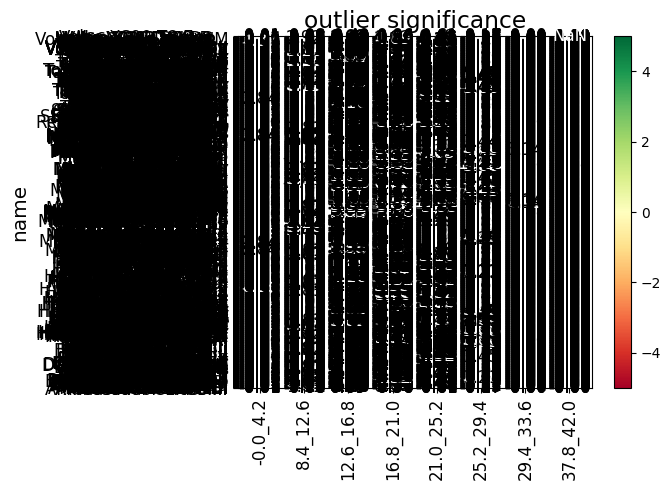

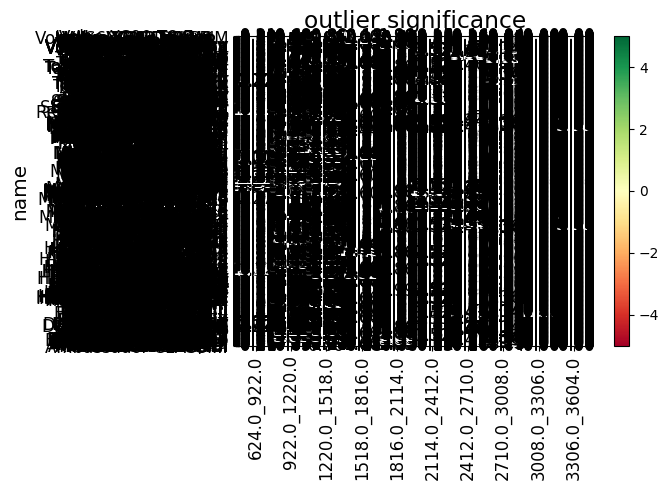

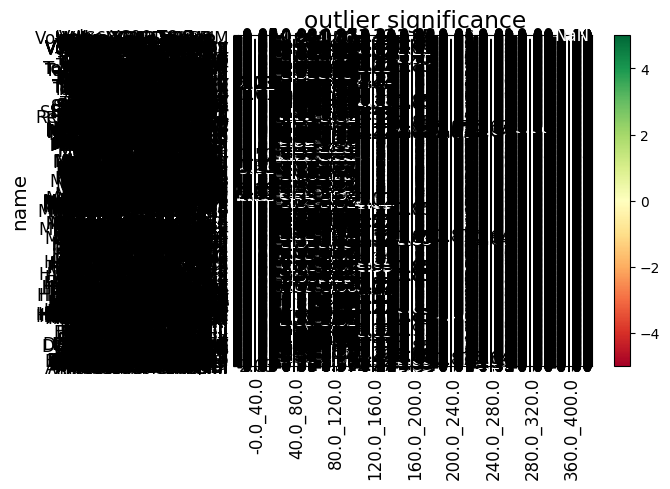

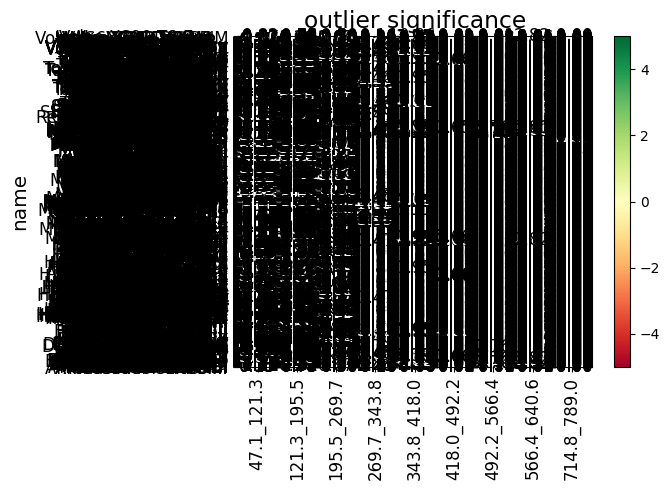

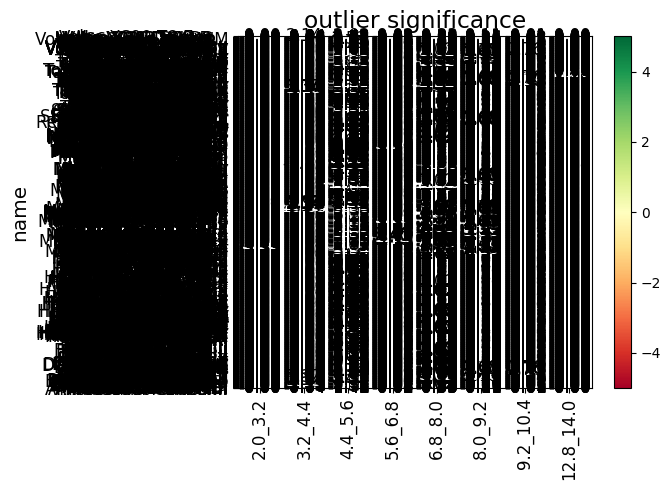

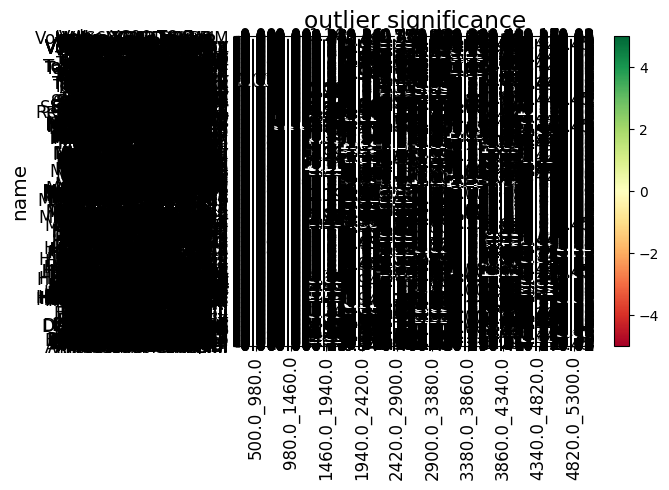

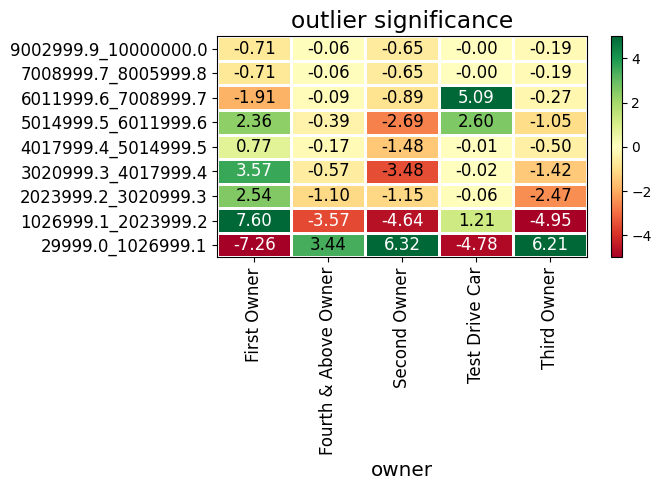

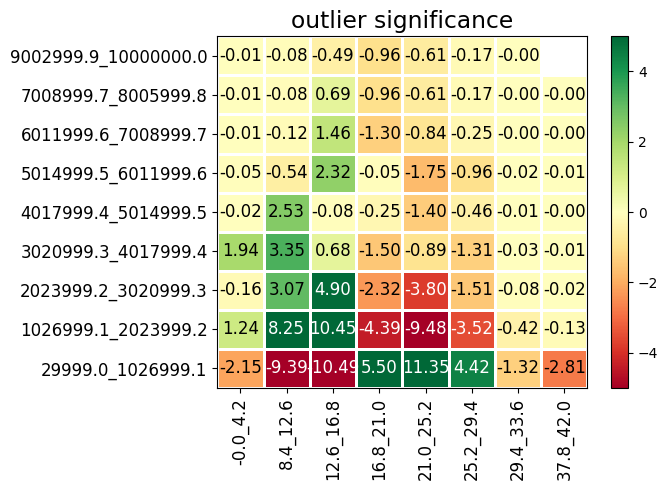

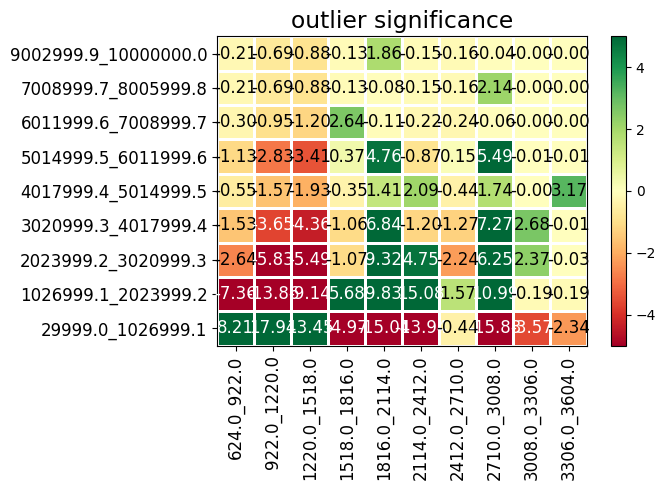

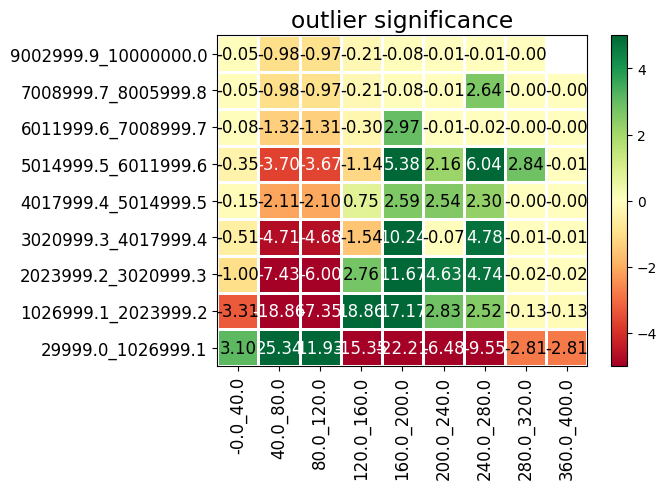

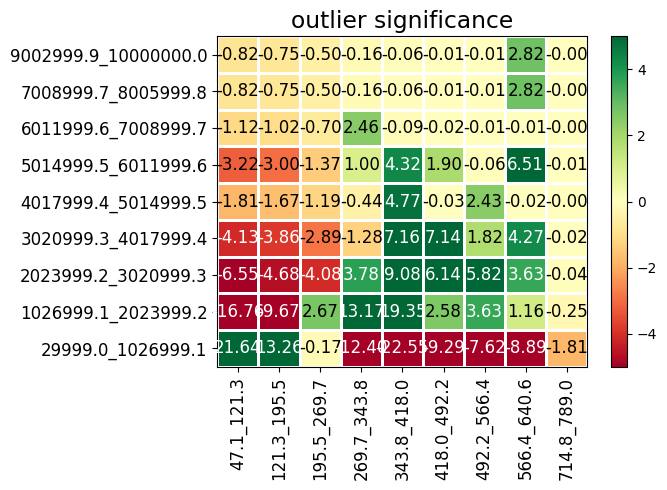

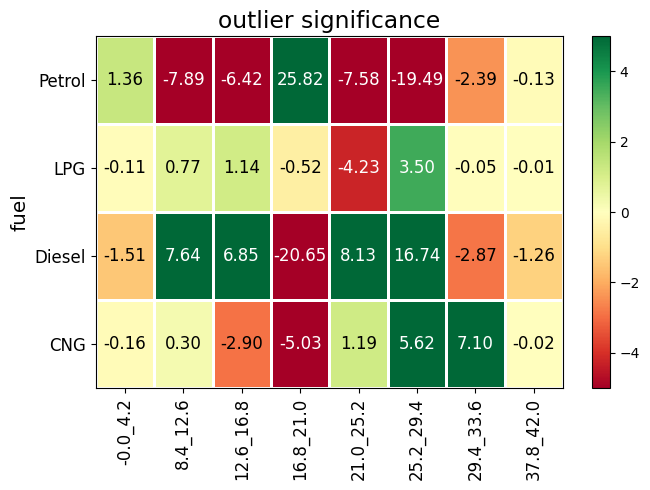

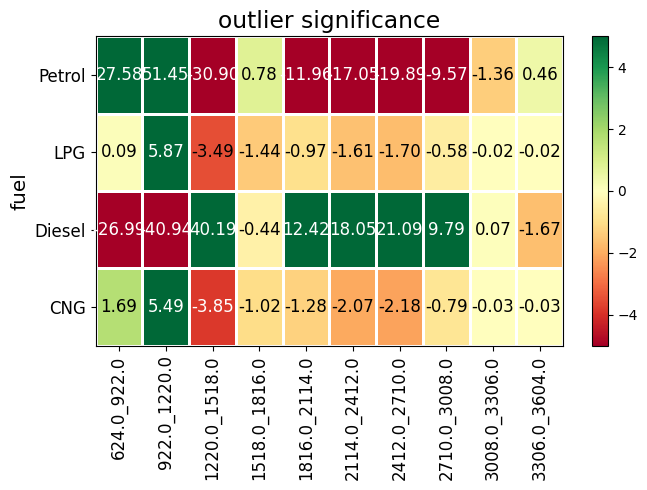

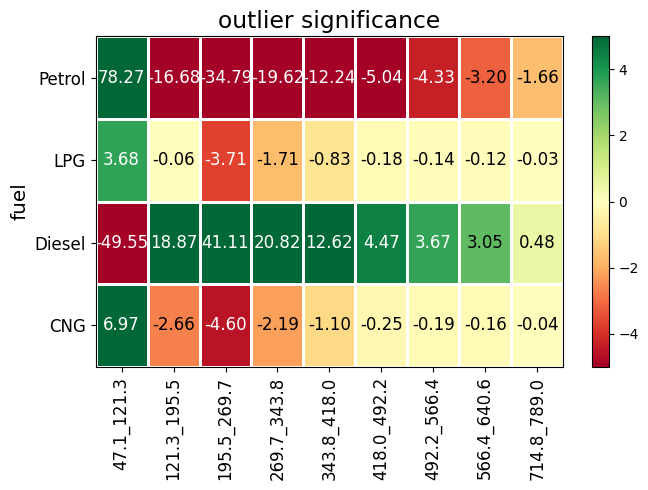

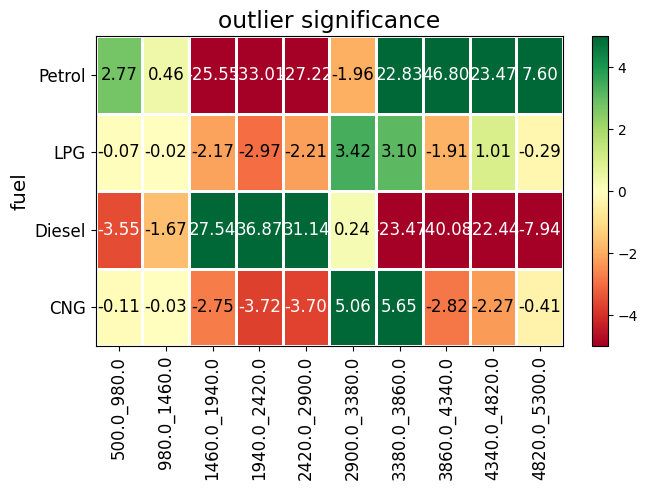

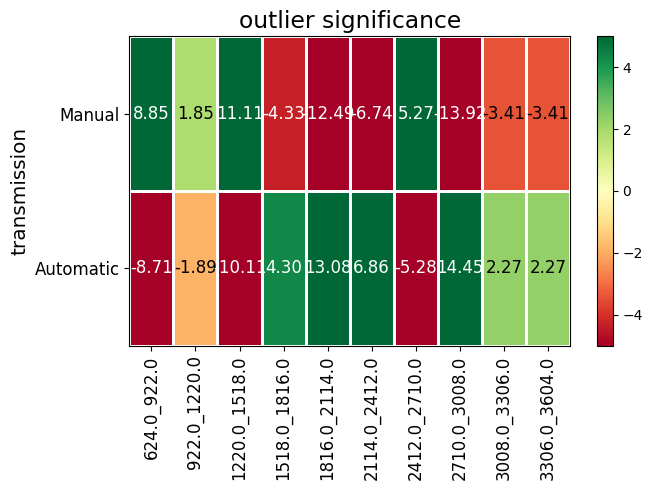

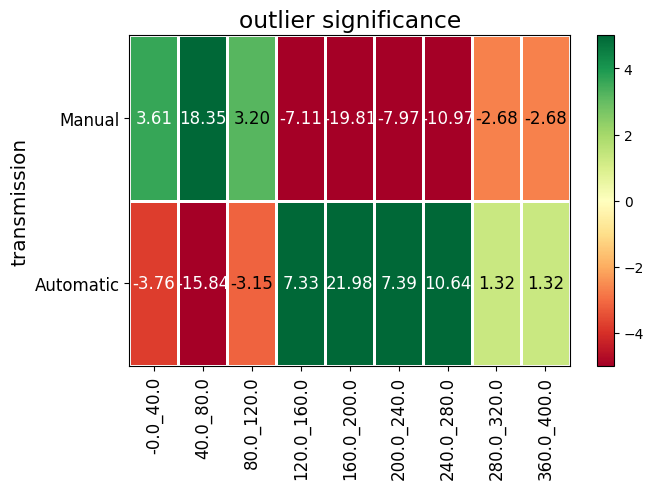

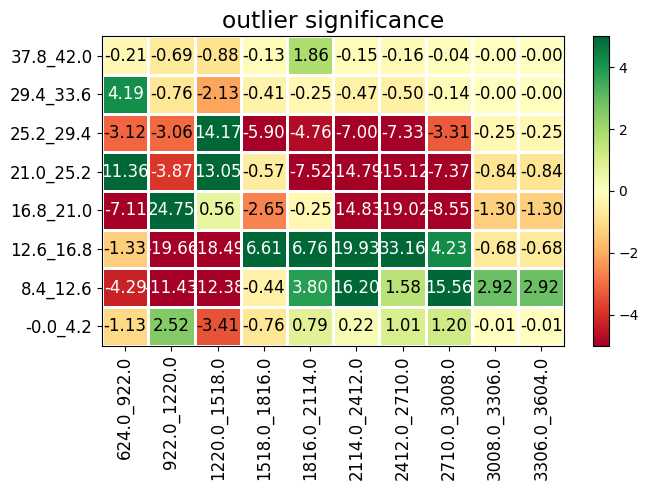

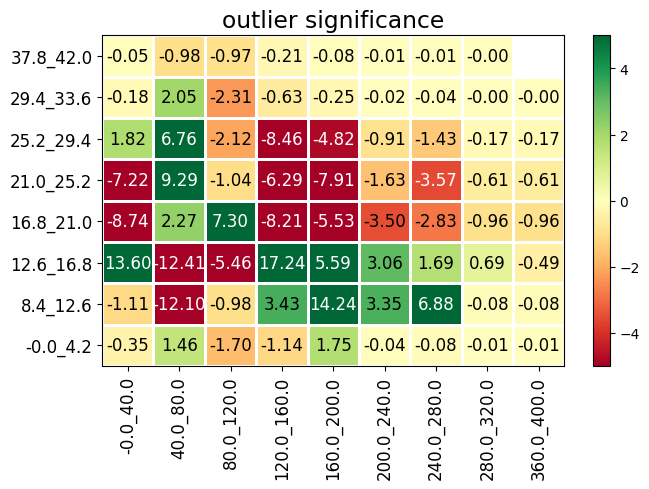

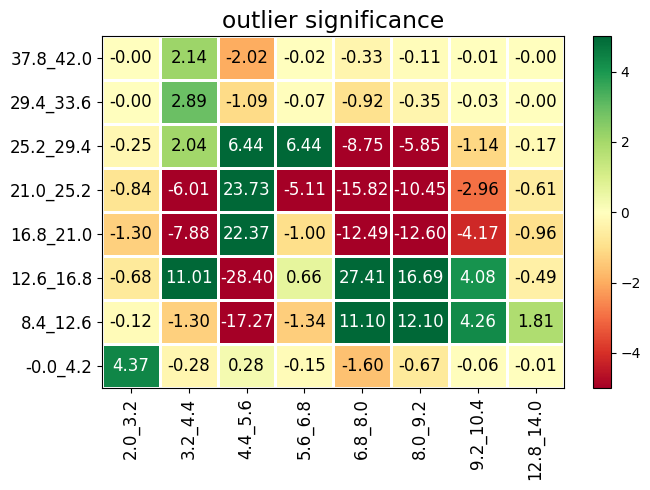

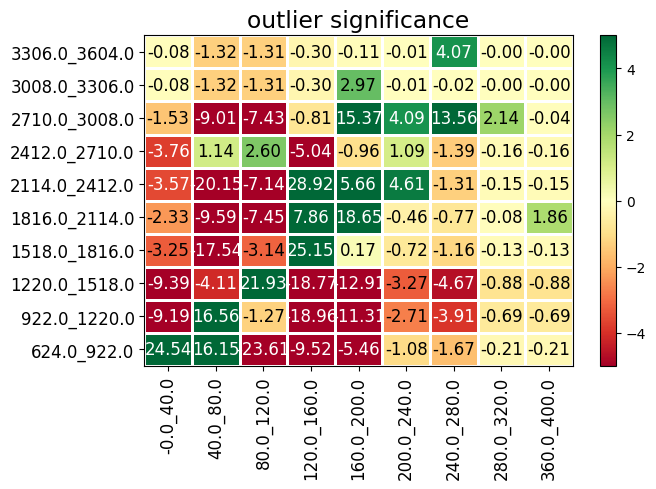

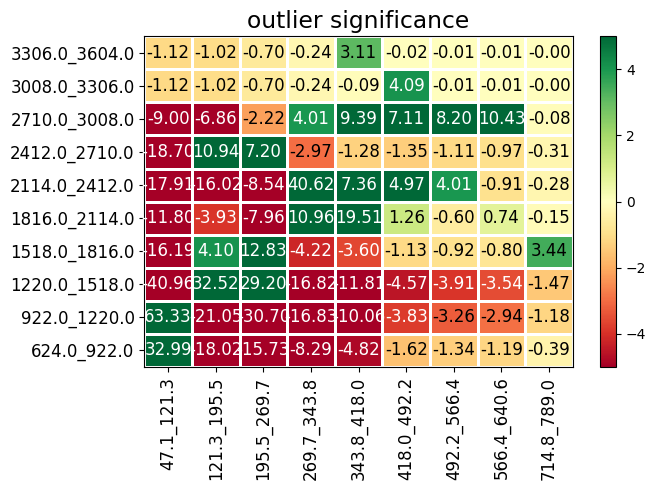

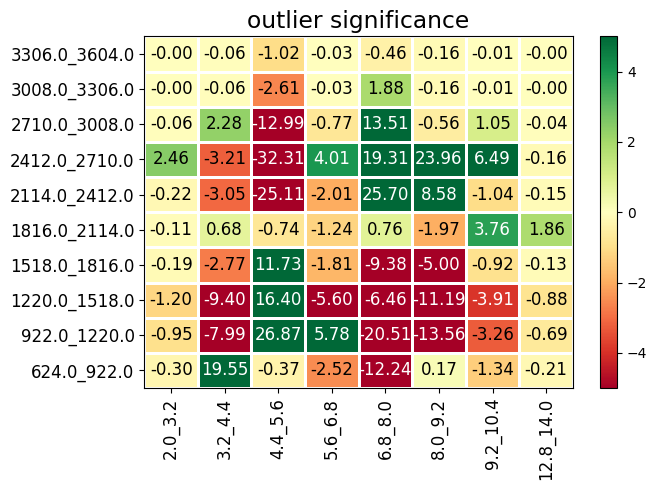

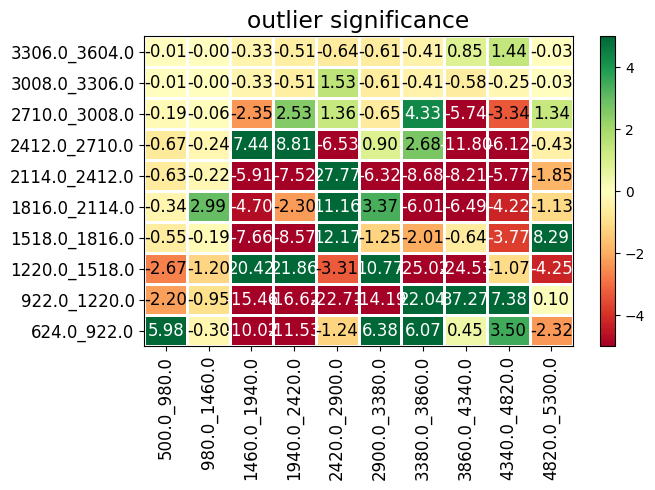

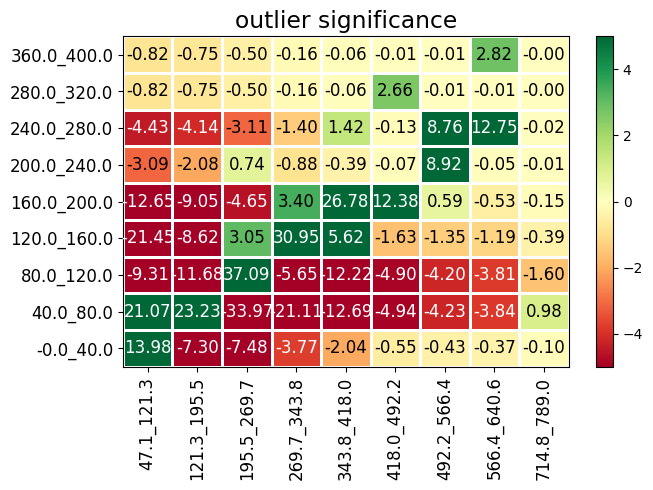

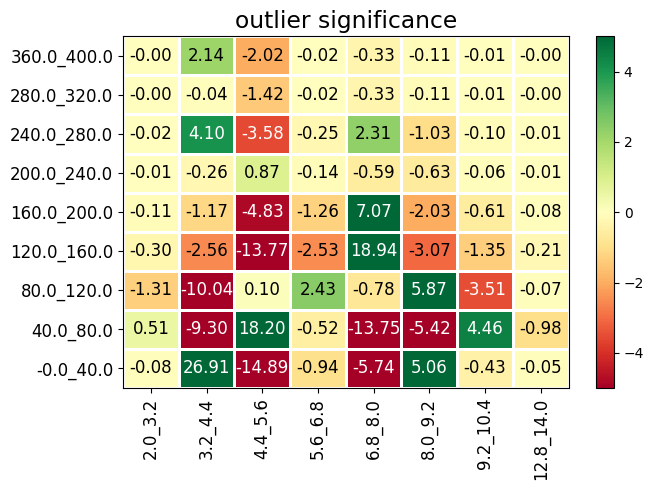

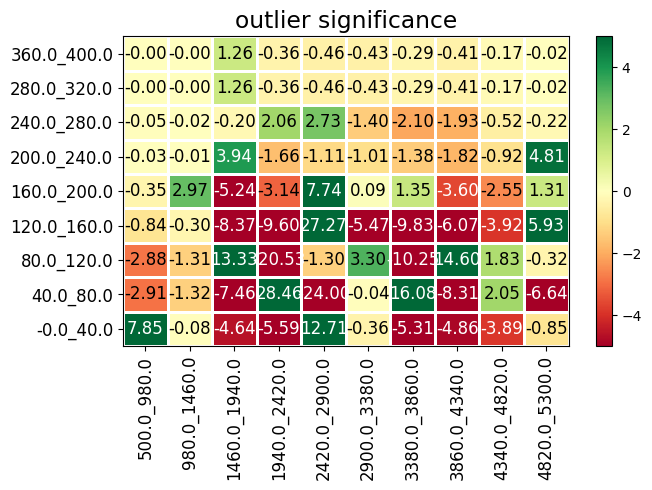

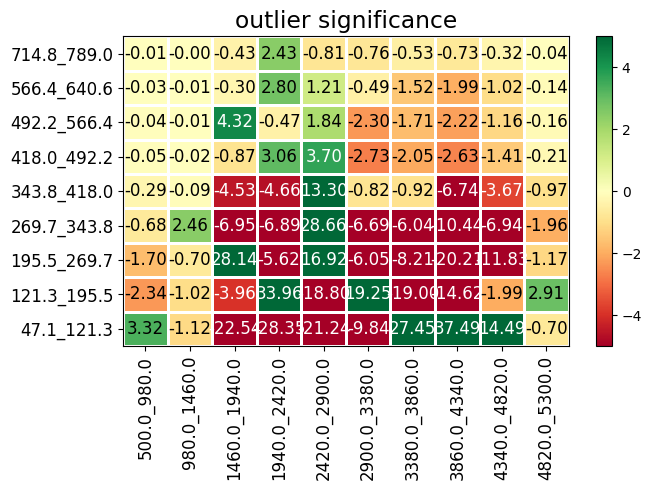

In [ ]:
report.correlation_report(df_train)

In [ ]:
df_train.significance_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


name        year  selling_price  km_driven       fuel  \
name            62.008648   45.207266      21.788509   2.944911  56.722627   
year            45.207266  127.975136      14.963895   6.241716  15.203594   
selling_price   21.788509   14.963895      59.579534  -0.363585  13.640085   
km_driven        2.944911    6.241716      -0.363585  26.121754   5.467133   
fuel            56.722627   15.203594      13.640085   5.467133  93.986981   
seller_type     15.380492   11.218491      12.188332   2.271667   4.974013   
transmission    30.870405   10.803068      25.155710   2.189117   3.188057   
owner           14.943472   38.395306      10.622241   3.663948   2.196564   
mileage         65.566130   29.718096      16.022709   6.225222  29.490335   
engine          68.730465   17.042659      32.968571   8.441045  62.932308   
max_power       61.459428   17.835096      37.892455   0.550593  20.336107   
torque          67.834934   24.020897      37.054619   4.148862  69.281162   
seats           44.834460   17.848854      13.637560   6.876383  29.842384   
max_torque_rpm  74.993880   31.824623      17.711473   4.249244  71.125004   

                seller_type  transmission       owner     mileage      engine  \
name              15.380492     30.870405   14.943472   65.566130   68.730465   
year              11.218491     10.803068   38.395306   29.718096   17.042659   
selling_price     12.188332     25.155710   10.622241   16.022709   32.968571   
km_driven          2.271667      2.189117    3.663948    6.225222    8.441045   
fuel               4.974013      3.188057    2.196564   29.490335   62.932308   
seller_type       64.102296     13.522634   14.930606    3.000738    8.186880   
transmission      13.522634     58.283487    7.472908   14.337615   23.918354   
owner             14.930606      7.472908  104.629849   12.887384    7.383793   
mileage            3.000738     14.337615   12.887384  125.209951   57.720303   
engine             8.186880     23.918354    7.383793   57.720303  136.148472   
max_power         13.374725     28.896564    6.332791   32.632961   66.825884   
torque            10.782450     23.950808   10.049671   42.126009   90.059459   
seats              2.501006      2.766139    3.344976   44.869928   58.139763   
max_torque_rpm     5.917064      9.438891   14.077959   36.496942   67.139283   

                 max_power      torque      seats  max_torque_rpm  
name             61.459428   67.834934  44.834460       74.993880  
year             17.835096   24.020897  17.848854       31.824623  
selling_price    37.892455   37.054619  13.637560       17.711473  
km_driven         0.550593    4.148862   6.876383        4.249244  
fuel             20.336107   69.281162  29.842384       71.125004  
seller_type      13.374725   10.782450   2.501006        5.917064  
transmission     28.896564   23.950808   2.766139        9.438891  
owner             6.332791   10.049671   3.344976       14.077959  
mileage          32.632961   42.126009  44.869928       36.496942  
engine           66.825884   90.059459  58.139763       67.139283  
max_power       115.563876   66.173621  34.634362       47.449215  
torque           66.173621  126.277391  38.749243       72.826601  
seats            34.634362   38.749243  90.806941       31.984442  
max_torque_rpm   47.449215   72.826601  31.984442      148.640537

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
df_num_train = df_train[numeric_cols].copy()

y_train = df_num_train['selling_price']
X_train = df_num_train.drop(['selling_price'], axis=1)

In [ ]:
X_train.shape

(5840, 8)

In [ ]:
numeric_cols

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
assert X_train.shape == (5840, 6) # 8 признаков а не 6

AssertionError: 

In [ ]:
df_num_test = df_test[numeric_cols].copy()

y_test = df_num_test['selling_price']
X_test = df_num_test.drop(['selling_price'], axis=1)

In [ ]:
assert X_test.shape == (1000, 6)  # 8 признаков а не 6

AssertionError: 

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
preds = {}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

preds['LinearRegression'] = y_pred

R2: 0.60
MSE: 229038559070.86


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [ ]:
def r2_score_manual(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = r2_score_manual(y_test, y_pred)
print(f"R2 manual: {r2:.2f}")

R2 manual: 0.60


`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [ ]:
def r2_score_adjusted(y_true, y_pred, degrees):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    df_res = len(y_true) - 1 - degrees
    df_tot = len(y_true) - 1
    r2 = 1 - ((ss_res - df_res) / (ss_tot - df_tot))
    return r2

r2 = r2_score_adjusted(y_test, y_pred, X_test.shape[1])
print(f"R2 adjusted: {r2:.2f}")

R2 adjusted: 0.60


`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")
preds['ScaledRegression'] = y_pred

R2: 0.60
MSE: 229038559070.85


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
X_train.columns[np.argmax(np.abs(model.coef_))]

'max_power'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

y_pred = model_lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

preds['ScaledLasso'] = y_pred


R2: 0.60
MSE: 229039272448.63


In [ ]:
model.coef_

array([165705.79899217, -49443.17787653, -13999.53380094,  13684.44407989,
       289705.81430105,  59653.2270875 , -33114.45598187, -39879.07606429])

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': np.logspace(0.1, 10, 20)}

model_lasso_cv = Lasso()

grid_search = GridSearchCV(estimator=model_lasso_cv, param_grid=param_grid, cv=10, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
model_lasso_cv = grid_search.best_estimator_
coefficients = model_lasso_cv.coef_
zeroed_weights = np.sum(coefficients == 0)

print(f"Best Params: {best_params}")
print(f"Zeroed weights: {zeroed_weights}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Params: {'alpha': 18553.29511349963}
Zeroed weights: 3


In [ ]:
y_pred = model_lasso_cv.predict(X_test_scaled)
mse = MSE(y_test, y_pred)

print(f"MSE: {mse:.2f}")
preds['ScaledLassoCV'] = y_pred

MSE: 242908885054.61


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
param_grid = {'alpha': np.logspace(0.1, 10, 20), 'l1_ratio': np.logspace(-3, 0, 20)}

model_elasticnet = ElasticNet()

grid_search = GridSearchCV(estimator=model_elasticnet, param_grid=param_grid, cv=10, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
model_elasticnet = grid_search.best_estimator_
coefficients = model_elasticnet.coef_
zeroed_weights = np.sum(coefficients == 0)

print(f"Best Params: {best_params}")
print(f"Zeroed weights: {zeroed_weights}")

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best Params: {'alpha': 18553.29511349963, 'l1_ratio': 1.0}
Zeroed weights: 3


In [ ]:
y_pred = model_elasticnet.predict(X_test_scaled)
mse = MSE(y_test, y_pred)

print(f"MSE: {mse:.2f}")
preds['ScaledElasticNetCV'] = y_pred

MSE: 242908885054.61


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
df_train['name'].value_counts()

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64

In [ ]:
df_train['brand'] = df_train['name'].apply(lambda x: x.split(' ')[0])
df_train['brand'].value_counts()

brand
Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: count, dtype: int64

In [ ]:
df_test['brand'] = df_test['name'].apply(lambda x: x.split(' ')[0])
df_test['brand'].value_counts()

brand
Maruti           290
Hyundai          198
Tata             106
Mahindra          90
Toyota            59
Honda             57
Ford              50
Renault           29
Chevrolet         24
Volkswagen        15
Skoda             13
Nissan            11
Volvo             10
BMW               10
Jaguar             8
Datsun             7
Mercedes-Benz      5
Mitsubishi         4
Jeep               3
Lexus              3
Fiat               3
Audi               2
Ambassador         1
Opel               1
Ashok              1
Name: count, dtype: int64

In [ ]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [ ]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

In [ ]:
assert X_train_cat.shape == (5840, 13) # 13 признаков а не 11

In [ ]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm',
       'brand'],
      dtype='object')

In [ ]:
cat_columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats'], dtype='object')

In [ ]:
X_train_cat

year  km_driven    fuel seller_type transmission                 owner  \
0     2014     145500  Diesel  Individual       Manual           First Owner   
1     2014     120000  Diesel  Individual       Manual          Second Owner   
2     2010     127000  Diesel  Individual       Manual           First Owner   
3     2007     120000  Petrol  Individual       Manual           First Owner   
4     2017      45000  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
6992  2008     191000  Petrol  Individual       Manual           First Owner   
6993  2013      50000  Petrol  Individual       Manual          Second Owner   
6994  2013     110000  Petrol  Individual       Manual           First Owner   
6995  2007     119000  Diesel  Individual       Manual  Fourth & Above Owner   
6996  2009     120000  Diesel  Individual       Manual           First Owner   

      mileage  engine  max_power     torque  seats  max_torque_rpm    brand  
0       23.40    1248      74.00  190.00000      5          2000.0   Maruti  
1       21.14    1498     103.52  250.00000      5          2500.0    Skoda  
2       23.00    1396      90.00  219.66896      5          2750.0  Hyundai  
3       16.10    1298      88.20  160.00000      5          3000.0   Maruti  
4       20.14    1197      81.86  113.75000      5          4000.0  Hyundai  
...       ...     ...        ...        ...    ...             ...      ...  
6992    17.92    1086      62.10   96.10000      5          3000.0  Hyundai  
6993    18.90     998      67.10   90.00000      5          3500.0   Maruti  
6994    18.50    1197      82.85  113.70000      5          4000.0  Hyundai  
6995    16.80    1493     110.00  160.00000      5          3000.0  Hyundai  
6996    19.30    1248      73.90  190.00000      5          2000.0   Maruti  

[5840 rows x 13 columns]

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
cat_columns = X_train_cat.select_dtypes(include='object').columns.append(pd.Index(['seats']))

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


encoder = OneHotEncoder(sparse_output=False, max_categories=20, drop='first', handle_unknown='ignore')

encoded_features = encoder.fit_transform(X_train_cat[cat_columns])

feature_names = encoder.get_feature_names_out(cat_columns)

encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

encoded_df.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0       0.0          0.0                     1.0   
1          1.0       0.0          0.0                     1.0   
2          1.0       0.0          0.0                     1.0   
3          0.0       0.0          1.0                     1.0   
4          0.0       0.0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                           0.0                  1.0   
1                           0.0                  1.0   
2                           0.0                  1.0   
3                           0.0                  1.0   
4                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 0.0                   0.0   

   owner_Third Owner  ...  brand_Volvo  brand_infrequent_sklearn  seats_4  \
0                0.0  ...          0.0                       0.0      0.0   
1                0.0  ...          0.0                       0.0      0.0   
2                0.0  ...          0.0                       0.0      0.0   
3                0.0  ...          0.0                       0.0      0.0   
4                0.0  ...          0.0                       0.0      0.0   

   seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
1      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
2      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
3      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
4      1.0      0.0      0.0      0.0      0.0       0.0       0.0  

[5 rows x 37 columns]

In [ ]:
X_train_cat[feature_names] = encoded_features

X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power     torque  ...  brand_Volvo  brand_infrequent_sklearn  \
0    1248      74.00  190.00000  ...          0.0                       0.0   
1    1498     103.52  250.00000  ...          0.0                       0.0   
2    1396      90.00  219.66896  ...          0.0                       0.0   
3    1298      88.20  160.00000  ...          0.0                       0.0   
4    1197      81.86  113.75000  ...          0.0                       0.0   

  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0     0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
1     0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
2     0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
3     0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
4     0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  

[5 rows x 50 columns]

In [ ]:
X_train_cat.drop(cat_columns, axis=1, inplace=True)

In [ ]:
encoded_df.shape

(5840, 37)

In [ ]:
encoded_features = encoder.transform(X_test_cat[cat_columns])
X_test_cat[feature_names] = encoded_features
X_test_cat.drop(cat_columns, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_test_cat.shape

(1000, 44)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Следить за тем, чтобы не было утечки данных при преобразовании тестовых данных. А так же ограничить количество категорий, как например для столбца name, чтобы не переусложнять модель
2. Удалять один столбец нужно, чтобы избежать мультиколлинеарности в признаках.
3. Удалить признаки можно, если модель обучена на независимых признаках, так как тогда веса интерпретируемы, и маленький вес говорит, о том, что этот признак не несет информации.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

model_ridge = Ridge()

param_grid = {'alpha': np.logspace(-3, 3, 20)}

grid_search = GridSearchCV(estimator=model_ridge, param_grid=param_grid, cv=10, scoring='r2', verbose=1)


grid_search.fit(X_train_cat, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best R^2: {grid_search.best_score_}")
print(f"Best Params: {best_params}")
best_model.coef_

model_ridge = grid_search.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.04189e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04324e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best R^2: 0.7136354612129919
Best Params: {'alpha': 0.001}


In [ ]:
y_pred = model_ridge.predict(X_test_cat)
mse = MSE(y_test, y_pred)

print(f"MSE: {mse:.2f}")
preds['RidgeCV'] = y_pred

MSE: 150656309382.70


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    y_diff = np.abs(y_true - y_pred) / y_true
    business_metric = np.mean(y_diff <= 0.1)
    return business_metric

business_metrics(y_test, y_pred)

0.298

In [ ]:
for model_name, y_pred in preds.items():
    business_metric = business_metrics(y_test, y_pred)
    print(f"{model_name}: {business_metric}")

LinearRegression: 0.249
ScaledRegression: 0.249
ScaledLasso: 0.249
ScaledLassoCV: 0.243
ScaledElasticNetCV: 0.243
RidgeCV: 0.298


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Метрика: насколько в среднем процентов ошибается модель при прогнозе, при этом

In [ ]:
def your_business_metrics(y_true, y_pred):
    y_diff = (y_true - y_pred) / y_true
    business_metric = np.mean((y_diff <= 0.15) & (y_diff > 0))
    return business_metric


your_business_metrics(y_test, y_pred)

0.216

In [ ]:
for model_name, y_pred in preds.items():
    business_metric = your_business_metrics(y_test, y_pred)
    print(f"{model_name}: {business_metric}")

LinearRegression: 0.181
ScaledRegression: 0.181
ScaledLasso: 0.181
ScaledLassoCV: 0.187
ScaledElasticNetCV: 0.187
RidgeCV: 0.216


In [ ]:
import pickle


models = [model_reg, model, model_lasso, model_lasso_cv, model_elasticnet, model_ridge]
model_name = ['LinearRegression', 'ScaledRegression', 'ScaledLasso', 'ScaledLassoCV', 'ScaledElasticNetCV', 'RidgeCV']


model_dict = dict(zip(model_name, models))
with open('model_dict.pkl', 'wb') as f:
    pickle.dump(model_dict, f)


In [ ]:
with open('model_ridge.pkl', 'wb') as f:
    pickle.dump(model_ridge, f)

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>